In [180]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
# import some data to play with
df=pd.read_csv("SeoulBikeData.csv", encoding="latin1")


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8736 non-null   float64
 9   Rainfall(mm)               8718 non-null   float64
 10  Snowfall (cm)              8742 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [175]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,No Holiday,Yes


In [57]:
df["Seasons"].replace(["Winter","Spring","Summer","Autumn"], [1,2,3,4], inplace=True)

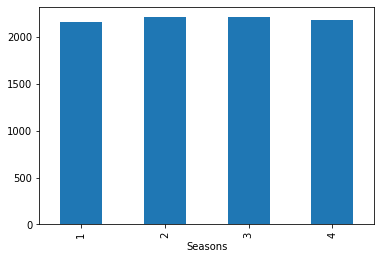

In [58]:
df.groupby(["Seasons"]).size().plot(kind="bar")

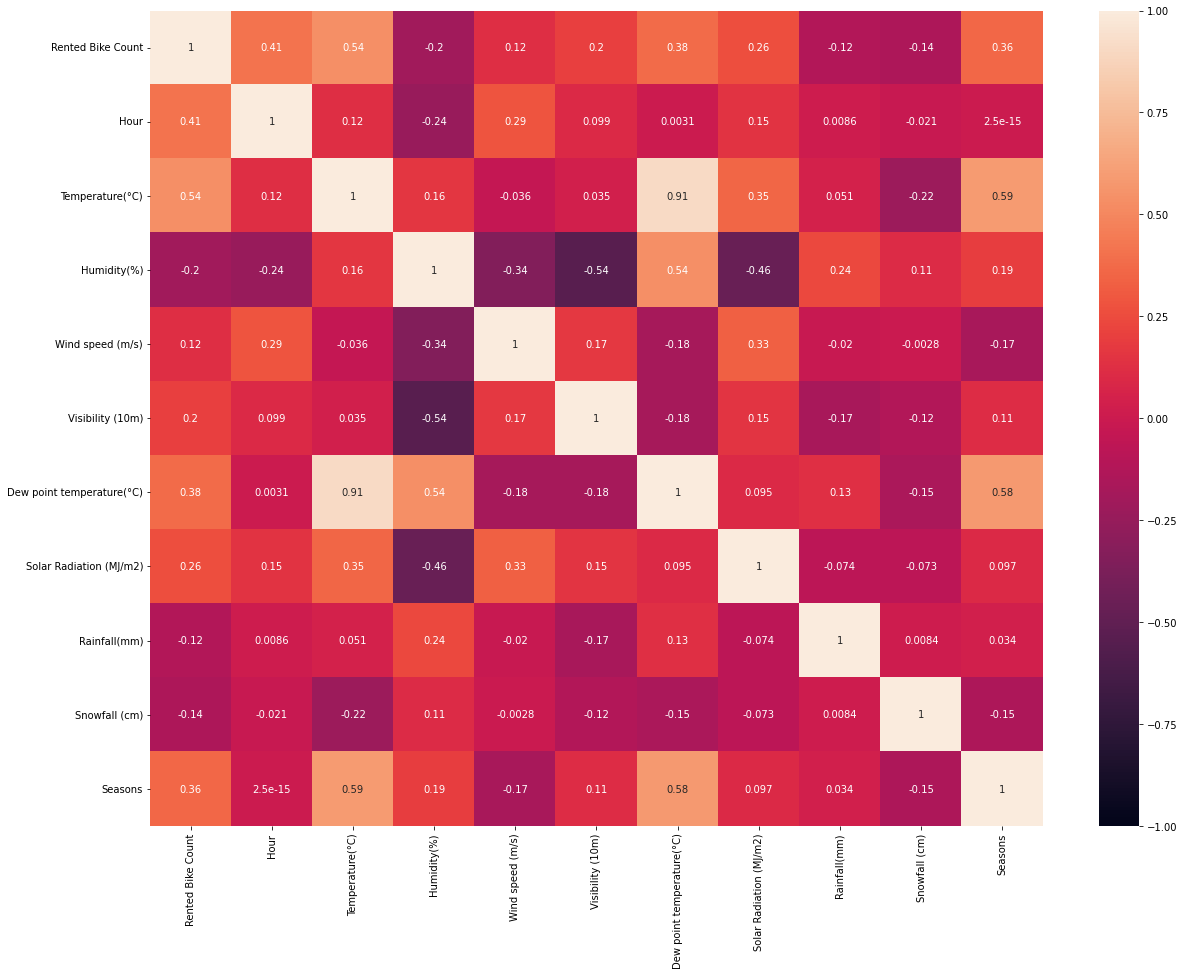

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [134]:
df_split = np.array_split(df, 4)
CX=[]
CY=[]
old_CX=[]
old_CY=[]

In [135]:
for i in df_split:
  CY.append(i["Dew point temperature(°C)"].mean())
  CX.append(i["Temperature(°C)"].mean())

In [136]:
CX

[-2.5152511415525116,
 13.275159817351598,
 26.619908675799085,
 14.151872146118722]

In [137]:
CY

[-12.354657534246575, 4.331187214611873, 18.77990867579909, 5.538812785388129]

In [138]:
new_df=df[["Temperature(°C)", "Dew point temperature(°C)"]]
new_df=new_df.assign(Error0=0)
new_df=new_df.assign(Error1=0)
new_df=new_df.assign(Error2=0)
new_df=new_df.assign(Error3=0)

In [139]:
new_df.head()

,Temperature(°C),Dew point temperature(°C),Error0,Error1,Error2,Error3
0,-5.2,-17.6,0,0,0,0
1,-5.5,-17.6,0,0,0,0
2,-6.0,-17.7,0,0,0,0
3,-6.2,-17.6,0,0,0,0
4,-6.0,-18.6,0,0,0,0


In [140]:
def dist(x1,x2,y1,y2):
  return math.sqrt(((x1-x2)**2)+(y1-y2)**2)

In [141]:
def calc_dist_of_each_point_to_each_centroid():
  for i in new_df.index:
    new_df.loc[i,"Error0"]=dist(new_df.loc[i, "Temperature(°C)"],CX[0],new_df.loc[i, "Dew point temperature(°C)"],CY[0])
    new_df.loc[i,"Error1"]=dist(new_df.loc[i, "Temperature(°C)"],CX[1],new_df.loc[i, "Dew point temperature(°C)"],CY[1])
    new_df.loc[i,"Error2"]=dist(new_df.loc[i, "Temperature(°C)"],CX[2],new_df.loc[i, "Dew point temperature(°C)"],CY[2])
    new_df.loc[i,"Error3"]=dist(new_df.loc[i, "Temperature(°C)"],CX[3],new_df.loc[i, "Dew point temperature(°C)"],CY[3])

In [142]:
def select_new_centroids():
  c = [[], [], [], []]
  for i in new_df.index:
    temp=[new_df.loc[i, "Error0"],new_df.loc[i, "Error1"],new_df.loc[i, "Error2"],new_df.loc[i, "Error3"]]
    temp.sort()
    if  new_df.loc[i, "Error0"] == temp[0]:
      c[0].append({"x": new_df.loc[i, "Temperature(°C)"], "y":new_df.loc[i, "Dew point temperature(°C)"]})
    elif new_df.loc[i, "Error1"] == temp[0]:
      c[1].append({"x": new_df.loc[i, "Temperature(°C)"], "y":new_df.loc[i, "Dew point temperature(°C)"]})
    elif new_df.loc[i, "Error2"] == temp[0]:
      c[2].append({"x": new_df.loc[i, "Temperature(°C)"], "y":new_df.loc[i, "Dew point temperature(°C)"]})
    else:
      c[3].append({"x": new_df.loc[i, "Temperature(°C)"], "y":new_df.loc[i, "Dew point temperature(°C)"]})
  index=0
  for i in c:
    sumx=0
    sumy=0
    for j in i:
        sumx =sumx + j["x"]
        sumy =sumy + j["y"]
    avgx=sumx/len(i)
    avgy=sumy/len(i)
    
    CX[index]=avgx
    CY[index]=avgy
    index += 1
  return c

In [143]:
def converged():
  convergence=True
  for i in range(0,4):
    if abs(old_CX[i]-CX[i])>0.3 or abs(old_CY[i]-CY[i])>0.3:
      convergence=False
      break
  return convergence

In [152]:
calc_dist_of_each_point_to_each_centroid()
old_CX=CX.copy()
old_CY=CY.copy()
clusters=select_new_centroids()


In [160]:
old_CY

[-12.861297071129682, 0.8276907529055079, 18.258360071301258, 8.55762925598989]

In [161]:
CY

[-14.323670082967286,
 0.02989550204452511,
 18.784206380464752,
 8.765550481988821]

In [159]:
len(clusters[3])

1971

In [162]:
while not converged():
  calc_dist_of_each_point_to_each_centroid()
  old_CX=CX.copy()
  old_CY=CY.copy()
  select_new_centroids()

In [163]:
calc_dist_of_each_point_to_each_centroid()
old_CX=CX.copy()
old_CY=CY.copy()
clusters=select_new_centroids()

In [165]:
old_CX

[-4.565664961636832, 5.64177272727273, 26.39913759310079, 16.45766871165648]

In [166]:
CX

[-4.592362002567398, 5.590502283105026, 26.361301636788824, 16.403515944399057]

In [171]:
clusters1=[{"x":[],"y":[]},{"x":[],"y":[]},{"x":[],"y":[]},{"x":[],"y":[]}]
row_index=0
for i in clusters:
  for j in i:
    clusters1[row_index]["x"].append(j["x"])
    clusters1[row_index]["y"].append(j["y"])
  row_index +=1
clusters1

[{'x': [-5.2,
   -5.5,
   -6.0,
   -6.2,
   -6.0,
   -6.4,
   -6.6,
   -7.4,
   -7.6,
   -6.5,
   -3.5,
   -0.5,
   1.7,
   2.4,
   3.0,
   2.1,
   -3.8,
   -4.0,
   -4.3,
   -4.4,
   -4.2,
   -2.9,
   -1.5,
   -1.1,
   -0.5,
   -0.3,
   0.0,
   0.1,
   -0.1,
   -0.2,
   -1.3,
   -2.1,
   -2.9,
   -3.6,
   -4.6,
   -5.3,
   -5.8,
   -6.1,
   -6.5,
   -6.8,
   -6.9,
   -7.2,
   -7.4,
   -7.4,
   -7.5,
   -8.1,
   -7.6,
   -5.5,
   -3.9,
   -2.3,
   -1.6,
   -1.1,
   -0.7,
   -0.5,
   -1.6,
   -2.6,
   -3.2,
   -3.5,
   -3.7,
   -2.8,
   -2.5,
   -3.4,
   -3.6,
   -3.7,
   -4.2,
   -4.2,
   -3.3,
   0.7,
   -0.4,
   -1.4,
   -2.2,
   -2.7,
   -3.2,
   -3.5,
   -3.7,
   -4.3,
   -4.8,
   -5.3,
   -5.8,
   -6.0,
   -6.5,
   -7.0,
   -6.7,
   -5.3,
   -3.7,
   -2.0,
   -1.7,
   -1.3,
   -0.8,
   -1.1,
   -2.4,
   -3.1,
   -3.3,
   -3.3,
   -3.3,
   -3.4,
   -3.5,
   -3.5,
   -4.1,
   -4.7,
   -4.3,
   -4.3,
   -4.7,
   -5.1,
   -5.5,
   -5.4,
   -4.7,
   -2.2,
   0.0,
   -1.0,
   -1.4,
   -

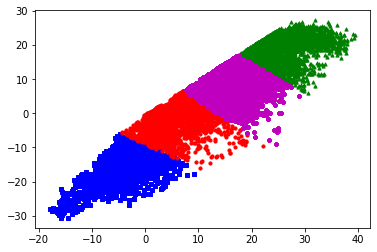

In [174]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(clusters1[0]["x"], clusters1[0]["y"], s=10, c='b', marker="s")
ax1.scatter(clusters1[1]["x"], clusters1[1]["y"], s=10, c='r', marker="o")
ax1.scatter(clusters1[2]["x"], clusters1[2]["y"], s=10, c='g', marker="^")
ax1.scatter(clusters1[3]["x"], clusters1[3]["y"], s=10, c='m', marker="P")
plt.show()

In [176]:
colors = {'Autumn':'red', 'Spring':'green', 'Winter':'blue', 'Summer':'yellow'}

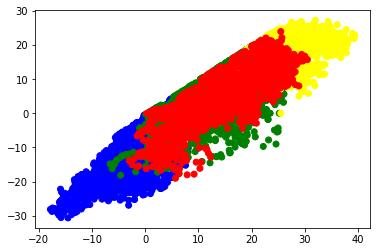

In [181]:
fig=plt.figure()
plt.scatter(df['Temperature(°C)'], df['Dew point temperature(°C)'], c=df['Seasons'].map(colors))
